<center><h1>WEEK 3 ASSIGNMENT: Clustering Toronto Neighborhoods<h1/><center> 

Le'ts start by importing the libraries needed

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!pip install geopy
from geopy.geocoders import Nominatim

!pip install geocoder
import geocoder 

import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

!pip install folium
import folium 

print('Libraries imported')

Libraries imported


<h2> SCRAPING WIKIPEDIA </h2>

First, let's make a DataFrame of the Wikipedia Table we need for our Clustering.

In [2]:
#Table with the Toronto Postal Codes, Boroughs, and Neighborhoods
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
#Making a get request
s=requests.Session()
response= s.get(url, timeout=10)
response

<Response [200]>

In [4]:
#Parsing the response content to html
soup=BeautifulSoup(response.content, 'html.parser')

In [5]:
#Viewing the content in html format
pretty_soup=soup.prettify()

In [6]:
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [7]:
#Find all the tables in the html
all_tables=soup.find_all('table')

In [8]:
#Het the right table to scrap
right_table=soup.find('table', {'class': 'wikitable sortable'})

In [9]:
#Number of columns in the table
for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    
len(cells)

3

In [10]:
#Number of rows in the table including the header
rows=right_table.findAll('tr')
len(rows)

181

In [11]:
#Header attributes of the table
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)
print('--------------')
print(len(header))

['Postal Code', 'Borough', 'Neighbourhood']
--------------
3


In [12]:
#Get tabular data

lst_data=[]
for row in rows[1:]:
    data = [d.text.rstrip() for d in row.find_all('td')]
    lst_data.append(data)

In [13]:
#Alternatively, select also works as find_all
lst_data1=[]
for row in rows[1:]:
    data= [d.text.rstrip() for d in row.select('td')]
    lst_data1.append(data)

In [14]:
#sample records
lst_data[0:5]

[['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park, Harbourfront']]

In [15]:
lst_data1[0:5]

[['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park, Harbourfront']]

In [16]:
#Length of each record
len(lst_data[0])

3

In [17]:
#Number of rows excluding the header
len(lst_data)

180

<h2>CREATING THE DATAFRAME<h2/>

Let's start with an empty DataFrame and append the values from our lst_data

In [18]:
#Empty DataFrame
df_toronto=pd.DataFrame(columns=header)

In [19]:
df_toronto

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []

In [20]:
#Appending cells from lst_data
for i,data in enumerate(lst_data,0):
    postal_code= lst_data[i][0]
    borough=lst_data[i][1]
    neighborhood=lst_data[i][2]
    
    df_toronto=df_toronto.append({'Postal Code':postal_code,
                                 'Borough':borough,
                                 'Neighbourhood':neighborhood}, ignore_index=True)

In [21]:
df_toronto.head()

Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [22]:
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
Postal Code      180 non-null object
Borough          180 non-null object
Neighbourhood    180 non-null object
dtypes: object(3)
memory usage: 4.3+ KB


In [23]:
#Drop rows with 'Not assigned' values
df_toronto.loc[(df_toronto['Borough']=='Not assigned'),:]=np.nan

#Assigning the Borough name to Neighborhoods where the name is 'Not assigned'
df_toronto.loc[(df_toronto['Neighbourhood']=='Not assigned'),'Neighbourhood']=df_toronto['Borough']

In [24]:
df_toronto=df_toronto.dropna(axis=0).reset_index(drop=True)


In [25]:
df_toronto.head()

Postal Code           Borough                                Neighbourhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [26]:
df_toronto.shape

(103, 3)

In [27]:
#Changing the name of column 3 to 'Neighborhood'
df_toronto.columns.values[2]='Neighborhood'

In [28]:
df_toronto

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

In [29]:
#Creating a new table with the Latitude and Longitude
latlon=['Latitude', 'Longitude']
df_latlon= pd.DataFrame(columns=latlon)
df_latlon

Empty DataFrame
Columns: [Latitude, Longitude]
Index: []

Code for getting the Latitude and Longitude values through the geocoder module and filling in the DataFrame

We will import it as csv from an already existing table. 

In [30]:

for postal in df_toronto['Postal Code']:
    g = geocoder.geocodefarm('{}, Toronto, Ontario'.format(postal))
    print(postal, ", coordinates : ", g.latlng)
    lat_lng_coords = g.latlng
    
    while g.latlng == None:
        g = geocoder.geocodefarm('{}, Toronto, Ontario'.format(postal))
        print(postal, ", coordinates : ", g.latlng)
        lat_lng_coords = g.latlng
    
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    df_latlon=df_latlon.append({'Latitude':latitude,
                                'Longitude':longitude}, ignore_index=True)

M3A , coordinates :  [43.7561225891716, -79.3296356201129]
M4A , coordinates :  [43.7267799377716, -79.3107376098129]
M5A , coordinates :  [43.6553535461715, -79.365043640113]
M6A , coordinates :  [43.7219963073716, -79.445915222113]
M7A , coordinates :  [43.6639099121715, -79.388732910113]
M9A , coordinates :  [43.6645202636715, -79.529075622513]
M1B , coordinates :  [43.8070793151717, -79.2015533447129]
M3B , coordinates :  [43.7463111877716, -79.357604980413]
M4B , coordinates :  [43.7066764831716, -79.3065795898129]
M5B , coordinates :  [43.6574783327152, -79.378631591713]
M6B , coordinates :  [43.7070999145716, -79.447883605913]
M9B , coordinates :  [43.6527595520715, -79.5523300171303]
M1C , coordinates :  [43.7872161865717, -79.1525192260129]
M3C , coordinates :  [43.7263832092716, -79.3407669067129]
M4C , coordinates :  [43.6897392272715, -79.3100509643129]
M5C , coordinates :  [43.6511116027715, -79.375732421813]
M6C , coordinates :  [43.6901702880715, -79.431266784613]
M9C , 

We can either use our newly created dataframe df_latlon or our CSV file for the coordinates. We will use the CSV file.

Creating a table with the geospatial coordinates from our CSV file. 

In [31]:
df_coordinates= pd.read_csv('Geospatial_Coordinates (1).csv')

In [32]:
df_coordinates.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

Joining the two tables on Postal Code.

In [33]:
df_toronto=df_toronto.join(df_coordinates.set_index('Postal Code'), on='Postal Code')

In [34]:
df_toronto

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

We will only Cluster neighborhoods in Toronto (whose Borough name includes Toronto)

In [35]:
#Dropping rows with places outside Toronto
df_t= df_toronto.loc[(name.split(' ')[-1]=='Toronto' for name in df_toronto['Borough']), :].reset_index(drop=True)

In [36]:
df_t

Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M7A  Downtown Toronto   
2          M5B  Downtown Toronto   
3          M5C  Downtown Toronto   
4          M4E      East Toronto   
5          M5E  Downtown Toronto   
6          M5G  Downtown Toronto   
7          M6G  Downtown Toronto   
8          M5H  Downtown Toronto   
9          M6H      West Toronto   
10         M5J  Downtown Toronto   
11         M6J      West Toronto   
12         M4K      East Toronto   
13         M5K  Downtown Toronto   
14         M6K      West Toronto   
15         M4L      East Toronto   
16         M5L  Downtown Toronto   
17         M4M      East Toronto   
18         M4N   Central Toronto   
19         M5N   Central Toronto   
20         M4P   Central Toronto   
21         M5P   Central Toronto   
22         M6P      West Toronto   
23         M4R   Central Toronto   
24         M5R   Central Toronto   
25         M6R      West Toronto   
26         M4S   Central Toronto   
27         M5S  Downtown Toronto   
28         M6S      West Toronto   
29         M4T   Central Toronto   
30         M5T  Downtown Toronto   
31         M4V   Central Toronto   
32         M5V  Downtown Toronto   
33         M4W  Downtown Toronto   
34         M5W  Downtown Toronto   
35         M4X  Downtown Toronto   
36         M5X  Downtown Toronto   
37         M4Y  Downtown Toronto   
38         M7Y      East Toronto   

                                         Neighborhood   Latitude  Longitude  
0                           Regent Park, Harbourfront  43.654260 -79.360636  
1         Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
2                            Garden District, Ryerson  43.657162 -79.378937  
3                                      St. James Town  43.651494 -79.375418  
4                                         The Beaches  43.676357 -79.293031  
5                                         Berczy Park  43.644771 -79.373306  
6                                  Central Bay Street  43.657952 -79.387383  
7                                            Christie  43.669542 -79.422564  
8                            Richmond, Adelaide, King  43.650571 -79.384568  
9                        Dufferin, Dovercourt Village  43.669005 -79.442259  
10  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
11                           Little Portugal, Trinity  43.647927 -79.419750  
12                       The Danforth West, Riverdale  43.679557 -79.352188  
13           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
14       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191  
15                     India Bazaar, The Beaches West  43.668999 -79.315572  
16                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
17                                    Studio District  43.659526 -79.340923  
18                                      Lawrence Park  43.728020 -79.388790  
19                                           Roselawn  43.711695 -79.416936  
20                                   Davisville North  43.712751 -79.390197  
21    Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307  
22                      High Park, The Junction South  43.661608 -79.464763  
23                 North Toronto West,  Lawrence Park  43.715383 -79.405678  
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678  
25                             Parkdale, Roncesvalles  43.648960 -79.456325  
26                                         Davisville  43.704324 -79.388790  
27                     University of Toronto, Harbord  43.662696 -79.400049  
28                                 Runnymede, Swansea  43.651571 -79.484450  
29                        Moore Park, Summerhill East  43.689574 -79.383160  
30          Kensington Market, Chinatown, Grange Park  43.653206 -79.400049  
31  Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -

<h2>Now we are going to start using the Foursquare API to explore the neighborhoods and segment them<h2/>

In [37]:
#We first define Foursquare Credentials and Version, the following cell is hidden

In [38]:
#Defining Foursquare Credentials and Version


CLIENT_ID= '2JN5Y5PQPURYGVO4TVIUJJTXSC11CZLQL5A2MCKURZ0HS0GZ'
CLIENT_SECRET= '5TEQ53TGFISDCT0QBEOM0SSDDXZISBTECEXBTWJHRNH4UVAF'
VERSION='20201122'
LIMIT=100

print('Your credentials were entered')


Your credentials were entered


<br>
<br>
Defining a function that returns a maximum of 100 popular venues in each of the Toronto Neighborhood

In [39]:
#Function loops through each neighborhood on our list one by one, and isolates the relevant information in the JSON file returned by the get request. 

def getNearbyVenues (names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip (names, latitudes, longitudes):
        print(name)
        
        #Create the API request URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        #Make the Get Request
        results=requests.get(url).json()['response']['groups'][0]['items']
        
        #Now, let's collect the relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
            
    nearby_venues= pd.DataFrame( item for venue_list in venues_list for item in venue_list)
        
    nearby_venues.columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
            
    return (nearby_venues)

<br>
<br>
Now we run the above function on each neighborhood in order to create a new DataFrame called toronto_venues

In [40]:
toronto_venues= getNearbyVenues(names=df_t['Neighborhood'], 
                               latitudes=df_t['Latitude'],
                               longitudes=df_t['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


<br>
<br>
We have a total of 1639 venues in our DataFrame

In [41]:
toronto_venues.shape

(1624, 7)

In [42]:
toronto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   
2  Regent Park, Harbourfront               43.65426              -79.360636   
3  Regent Park, Harbourfront               43.65426              -79.360636   
4  Regent Park, Harbourfront               43.65426              -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0        Roselle Desserts       43.653447       -79.362017   
1           Tandem Coffee       43.653559       -79.361809   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3     Body Blitz Spa East       43.654735       -79.359874   
4          Impact Kitchen       43.656369       -79.356980   

        Venue Category  
0               Bakery  
1          Coffee Shop  
2  Distribution Center  
3                  Spa  
4           Restaurant

**Let's check the number of venues in each neighborhood**

In [43]:
toronto_venues[['Neighborhood','Venue Category']].groupby(['Neighborhood']).count().rename(columns={'Venue Category':'Venues Count'})

Venues Count
Neighborhood                                                    
Berczy Park                                                   55
Brockton, Parkdale Village, Exhibition Place                  23
Business reply mail Processing Centre, South Ce...            16
CN Tower, King and Spadina, Railway Lands, Harb...            16
Central Bay Street                                            68
Christie                                                      16
Church and Wellesley                                          75
Commerce Court, Victoria Hotel                               100
Davisville                                                    33
Davisville North                                               9
Dufferin, Dovercourt Village                                  13
First Canadian Place, Underground city                       100
Forest Hill North & West, Forest Hill Road Park                4
Garden District, Ryerson                                     100
Harbourfront East, Union Station, Toronto Islands            100
High Park, The Junction South                                 25
India Bazaar, The Beaches West                                19
Kensington Market, Chinatown, Grange Park                     74
Lawrence Park                                                  3
Little Portugal, Trinity                                      45
Moore Park, Summerhill East                                    2
North Toronto West,  Lawrence Park                            18
Parkdale, Roncesvalles                                        14
Queen's Park, Ontario Provincial Government                   33
Regent Park, Harbourfront                                     44
Richmond, Adelaide, King                                     100
Rosedale                                                       4
Roselawn                                                       2
Runnymede, Swansea                                            33
St. James Town                                                85
St. James Town, Cabbagetown                                   48
Stn A PO Boxes                                                96
Studio District                                               37
Summerhill West, Rathnelly, South Hill, Forest ...            14
The Annex, North Midtown, Yorkville                           19
The Beaches                                                    4
The Danforth West, Riverdale                                  43
Toronto Dominion Centre, Design Exchange                     100
University of Toronto, Harbord                                34

<br>
<br>
Now, let's explore the number of unique categories among all venues

In [44]:
print('There are {} unique categories'.format(len(set(toronto_venues['Venue Category']))))

There are 235 unique categories


<h2> ANALYZING EACH NEIGHBORHOOD <h2/>

In [45]:
#One Hot Encoding
toronto_onehot=pd.get_dummies(toronto_venues[['Venue Category']], prefix=' ',prefix_sep=' ')

#Add the Neighborhood column to the DataFrame
toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']

#Let's make it the first column
fixed_columns=[toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot=toronto_onehot[fixed_columns]
toronto_onehot.head()
                

Neighborhood    Afghan Restaurant    Airport  \
0  Regent Park, Harbourfront                    0          0   
1  Regent Park, Harbourfront                    0          0   
2  Regent Park, Harbourfront                    0          0   
3  Regent Park, Harbourfront                    0          0   
4  Regent Park, Harbourfront                    0          0   

     Airport Food Court    Airport Gate    Airport Lounge    Airport Service  \
0                     0               0                 0                  0   
1                     0               0                 0                  0   
2                     0               0                 0                  0   
3                     0               0                 0                  0   
4                     0               0                 0                  0   

     Airport Terminal    American Restaurant    Antique Shop    Aquarium  \
0                   0                      0               0           0   
1                   0                      0               0           0   
2                   0                      0               0           0   
3                   0                      0               0           0   
4                   0                      0               0           0   

     Art Gallery    Art Museum    Arts & Crafts Store    Asian Restaurant  \
0              0             0                      0                   0   
1              0             0                      0                   0   
2              0             0                      0                   0   
3              0             0                      0                   0   
4              0             0                      0                   0   

     Athletics & Sports    Auto Workshop    BBQ Joint    Baby Store  \
0                     0                0            0             0   
1                     0                0            0             0   
2                     0                0            0             0   
3                     0                0            0             0   
4                     0                0            0             0   

     Bagel Shop    Bakery    Bank    Bar    Baseball Stadium  \
0             0         1       0      0                   0   
1             0         0       0      0                   0   
2             0         0       0      0                   0   
3             0         0       0      0                   0   
4             0         0       0      0                   0   

     Basketball Stadium    Beach    Bed & Breakfast    Beer Bar    Beer Store  \
0                     0        0                  0           0             0   
1                     0        0                  0           0             0   
2                     0        0                  0           0             0   
3                     0        0                  0           0             0   
4                     0        0                  0           0             0   

     Belgian Restaurant    Bistro    Boat or Ferry    Bookstore    Boutique  \
0                     0         0                0            0           0   
1                     0         0                0            0           0   
2                     0         0                0            0           0   
3                     0         0                0            0           0   
4                     0         0                0            0           0   

     Brazilian Restaurant    Breakfast Spot    Brewery    Bubble Tea Shop  \
0                       0                 0          0                  0   
1                       0                 0          0                  0   
2                       0                 0          0                  0   
3                       0                 0          0                  0   
4                       0                 0          0                 

<br>
<br>
Let's examine the size of our new dataframe

In [46]:
toronto_onehot.shape

(1624, 236)

We have one row for each venue

<h3>Now, we are ready to group the neighborhoods by row and calculate the mean frequencies per Venue Category<h3/>

In [47]:
toronto_grouped=toronto_onehot.groupby(['Neighborhood']).mean().reset_index()
toronto_grouped

Neighborhood    Afghan Restaurant  \
0                                         Berczy Park             0.000000   
1        Brockton, Parkdale Village, Exhibition Place             0.000000   
2   Business reply mail Processing Centre, South C...             0.000000   
3   CN Tower, King and Spadina, Railway Lands, Har...             0.000000   
4                                  Central Bay Street             0.000000   
5                                            Christie             0.000000   
6                                Church and Wellesley             0.013333   
7                      Commerce Court, Victoria Hotel             0.000000   
8                                          Davisville             0.000000   
9                                    Davisville North             0.000000   
10                       Dufferin, Dovercourt Village             0.000000   
11             First Canadian Place, Underground city             0.000000   
12    Forest Hill North & West, Forest Hill Road Park             0.000000   
13                           Garden District, Ryerson             0.000000   
14  Harbourfront East, Union Station, Toronto Islands             0.000000   
15                      High Park, The Junction South             0.000000   
16                     India Bazaar, The Beaches West             0.000000   
17          Kensington Market, Chinatown, Grange Park             0.000000   
18                                      Lawrence Park             0.000000   
19                           Little Portugal, Trinity             0.000000   
20                        Moore Park, Summerhill East             0.000000   
21                 North Toronto West,  Lawrence Park             0.000000   
22                             Parkdale, Roncesvalles             0.000000   
23        Queen's Park, Ontario Provincial Government             0.000000   
24                          Regent Park, Harbourfront             0.000000   
25                           Richmond, Adelaide, King             0.000000   
26                                           Rosedale             0.000000   
27                                           Roselawn             0.000000   
28                                 Runnymede, Swansea             0.000000   
29                                     St. James Town             0.000000   
30                        St. James Town, Cabbagetown             0.000000   
31                                     Stn A PO Boxes             0.000000   
32                                    Studio District             0.000000   
33  Summerhill West, Rathnelly, South Hill, Forest...             0.000000   
34                The Annex, North Midtown, Yorkville             0.000000   
35                                        The Beaches             0.000000   
36                       The Danforth West, Riverdale             0.000000   
37           Toronto Dominion Centre, Design Exchange             0.000000   
38                     University of Toronto, Harbord             0.000000   

      Airport    Airport Food Court    Airport Gate    Airport Lounge  \
0      0.0000                0.0000          0.0000             0.000   
1      0.0000                0.0000          0.0000             0.000   
2      0.0000                0.0000          0.0000             0.000   
3      0.0625                0.0625          0.0625             0.125   
4      0.0000                0.0000          0.0000             0.000   
5      0.0000                0.0000          0.0000             0.000   
6      0.0000                0.0000          0.0000             0.000   
7      0.0000                0.0000          0.0000             0.000   
8      0.0000                0.0000          0.0000             0.000   
9      0.0000                0.0000          0.0000             0.000   
10     0.0000                0.0000          0.0000             0.000   
11     0.0000                0.0000         

<br>
<br>
Let's extract the top 15 venues for each neighborhood
<br>
<br>
We first define a function to sort the venues in descending order

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[1:] #We drop the Neighborhood column for sorting
    row_categories_sorted=row_categories.sort_values(ascending=False) #We have a Series with the Venue Categories as Indices and order those by frequency 
    
    return row_categories_sorted.index.values[0: num_top_venues] 

Now we can create a new DataFrame to display the top 15 venues for each neighborhood

In [49]:
num_top_venues= 15
indicators=['st','nd','rd']

#Creating the Columns
columns=['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#Creating a new DataFrame
#Setting the columns
neighborhood_venues_sorted=pd.DataFrame(columns=columns)
#Filling in the Neighborhood column
neighborhood_venues_sorted['Neighborhood']=toronto_grouped['Neighborhood']
#Filling in the venue columnns; looping through all rows
for ind in np.arange(toronto_grouped.shape[0]): 
    #Locating column and populating columns [1:-1]
    neighborhood_venues_sorted.iloc[ind,1:] = return_most_common_venues(toronto_grouped.iloc[ind,:], num_top_venues)

neighborhood_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2  Business reply mail Processing Centre, South C...            Skate Park   
3  CN Tower, King and Spadina, Railway Lands, Har...        Airport Lounge   
4                                 Central Bay Street           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery          Cocktail Bar              Beer Bar   
1        Breakfast Spot             Nightclub           Coffee Shop   
2           Pizza Place               Brewery         Burrito Place   
3       Airport Service              Boutique       Harbor / Marina   
4                  Café    Italian Restaurant        Sandwich Place   

   5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
0            Cheese Shop    Seafood Restaurant              Restaurant   
1           Climbing Gym         Burrito Place              Restaurant   
2             Restaurant        Farmers Market    Fast Food Restaurant   
3       Sculpture Garden         Boat or Ferry     Rental Car Location   
4    Japanese Restaurant       Bubble Tea Shop             Salad Place   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0        Farmers Market        Sandwich Place         Breakfast Spot   
1    Italian Restaurant          Intersection                    Bar   
2               Butcher      Recording Studio          Auto Workshop   
3                   Bar           Coffee Shop                  Plane   
4          Burger Joint      Department Store        Thai Restaurant   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
0                  Beach          Shopping Mall                  Hotel   
1                Stadium                 Bakery                    Gym   
2     Light Rail Station                   Park                 Garden   
3                Airport     Airport Food Court           Airport Gate   
4       Ramen Restaurant            Yoga Studio                  Diner   

  14th Most Common Venue    15th Most Common Venue  
0           Concert Hall                    Bistro  
1          Grocery Store    Furniture / Home Store  
2          Garden Center                Comic Shop  
3       Airport Terminal            Cosmetics Shop  
4         Discount Store         Indian Restaurant

<br>
<br>
<h2> CLUSTERING NEIGHBORHOODS USING KMEANS

In order to find the optimal number of clusters we will use the Elbow method. Based on this rule, we proceed with clustering the Toronto neighborhoods into 8 clusters.

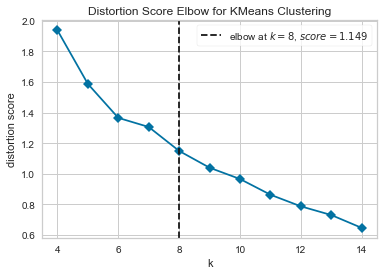

In [72]:
from yellowbrick.cluster import KElbowVisualizer

#Dropping the Neighborhood column for the Clustering
toronto_grouped_clustering=toronto_grouped.drop('Neighborhood', axis=1)

# Instantiate the clustering model and visualizer
# k is range of number of clusters.
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(4,15),  timings=False)

# Fit the data to the visualizer and render the figure
visualizer.fit(toronto_grouped_clustering)        
visualizer.show()    

We run the KMeans clustering algorithm from scikit learn to group Toronto's Neighborhoods into 8 distinct clusters

In [69]:
# Setting the number of clusters
Kclusters=8

# KMeans Clustering
k_means=KMeans(n_clusters=Kclusters, random_state=0).fit(toronto_grouped_clustering)

#Checking Cluster labels generated for each row in the DataFrame
k_means.labels_[0:40]

array([1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 7, 1, 4, 1, 1, 7, 1, 7, 6, 7, 5, 1,
       7, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 7], dtype=int32)

Let's create a new DataFrame that contains the cluster as well as the top 10 venues for each neighborhood

In [51]:
#Adding Cluster Labels
neighborhood_venues_sorted.insert(0,'Cluster Labels', k_means.labels_)

toronto_merged=df_t

#Merging neighborhood_venues_sorted with df_t to add latitude/longitude for each neighborhood 

toronto_merged=df_t.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M7A  Downtown Toronto   
2          M5B  Downtown Toronto   
3          M5C  Downtown Toronto   
4          M4E      East Toronto   
5          M5E  Downtown Toronto   
6          M5G  Downtown Toronto   
7          M6G  Downtown Toronto   
8          M5H  Downtown Toronto   
9          M6H      West Toronto   
10         M5J  Downtown Toronto   
11         M6J      West Toronto   
12         M4K      East Toronto   
13         M5K  Downtown Toronto   
14         M6K      West Toronto   
15         M4L      East Toronto   
16         M5L  Downtown Toronto   
17         M4M      East Toronto   
18         M4N   Central Toronto   
19         M5N   Central Toronto   
20         M4P   Central Toronto   
21         M5P   Central Toronto   
22         M6P      West Toronto   
23         M4R   Central Toronto   
24         M5R   Central Toronto   
25         M6R      West Toronto   
26         M4S   Central Toronto   
27         M5S  Downtown Toronto   
28         M6S      West Toronto   
29         M4T   Central Toronto   
30         M5T  Downtown Toronto   
31         M4V   Central Toronto   
32         M5V  Downtown Toronto   
33         M4W  Downtown Toronto   
34         M5W  Downtown Toronto   
35         M4X  Downtown Toronto   
36         M5X  Downtown Toronto   
37         M4Y  Downtown Toronto   
38         M7Y      East Toronto   

                                         Neighborhood   Latitude  Longitude  \
0                           Regent Park, Harbourfront  43.654260 -79.360636   
1         Queen's Park, Ontario Provincial Government  43.662301 -79.389494   
2                            Garden District, Ryerson  43.657162 -79.378937   
3                                      St. James Town  43.651494 -79.375418   
4                                         The Beaches  43.676357 -79.293031   
5                                         Berczy Park  43.644771 -79.373306   
6                                  Central Bay Street  43.657952 -79.387383   
7                                            Christie  43.669542 -79.422564   
8                            Richmond, Adelaide, King  43.650571 -79.384568   
9                        Dufferin, Dovercourt Village  43.669005 -79.442259   
10  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752   
11                           Little Portugal, Trinity  43.647927 -79.419750   
12                       The Danforth West, Riverdale  43.679557 -79.352188   
13           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576   
14       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191   
15                     India Bazaar, The Beaches West  43.668999 -79.315572   
16                     Commerce Court, Victoria Hotel  43.648198 -79.379817   
17                                    Studio District  43.659526 -79.340923   
18                                      Lawrence Park  43.728020 -79.388790   
19                                           Roselawn  43.711695 -79.416936   
20                                   Davisville North  43.712751 -79.390197   
21    Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307   
22                      High Park, The Junction South  43.661608 -79.464763   
23                 North Toronto West,  Lawrence Park  43.715383 -79.405678   
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678   
25                             Parkdale, Roncesvalles  43.648960 -79.456325   
26                                         Davisville  43.704324 -79.388790   
27                     University of Toronto, Harbord  43.662696 -79.400049   
28                                 Runnymede, Swansea  43.651571 -79.484450   
29                        Moore Park, Summerhill East  43.689574 -79.383160   
30          Kensington Market, Chinatown, Grange Park  43.653206 -79.400049   
31  Summerhill West, Rathnelly, So

**Finally, we can visualize the results of our Clustering on the Map**

In [52]:
#Let's find the Coordinates for Toronto

address='Toronto, Ontario'
geolocator=Nominatim(user_agent='toronto_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude

#Create Toronto Map

map_clusters=folium.Map(location=[latitude,longitude], zoom_start=11)

#Setting a color scheme for the clusters
x = np.arange(Kclusters)
ys = [i + x + (i*x)**2 for i in range(Kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Add Markers to the map

markers_colors=[]
for lat, lng, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    
    label=folium.Popup(str(poi)+', Cluster '+str(cluster), parse_html=True)
    folium.CircleMarker([lat,lng], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [53]:
cluster7=toronto_merged.loc[(toronto_merged['Cluster Labels']==7),:]
cluster7=cluster7.iloc[:,6:]

venues7_list=[]


for index in range(len(cluster7.index.values)):
    for column in range(len(cluster7.columns.values)):
    
        venues7_list.append(cluster7.iloc[index,column])
venues7_list.sort()


<br>
<br>
Now, we can explore each Cluster: 

<h3>Cluster 0

In [54]:
cluster0=toronto_merged.loc[toronto_merged['Cluster Labels']==0, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster0

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4  The Beaches               0                   Pub                 Trail   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4     Health Food Store          Neighborhood           Yoga Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4               Dog Run    Dim Sum Restaurant                 Diner   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
4        Discount Store    Distribution Center       Doner Restaurant   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
4       Department Store             Donut Shop    Dumpling Restaurant   

          15th Most Common Venue  
4    Eastern European Restaurant

The most popular venue in this cluster is pubs. We can also see some other categories belonging to the hospitality industry, and even trails and dog runs, as popular outdoors activities. 

<h3>Cluster 1

In [55]:
cluster1=toronto_merged.loc[toronto_merged['Cluster Labels']==1, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster1

Neighborhood  Cluster Labels  \
0                           Regent Park, Harbourfront               1   
1         Queen's Park, Ontario Provincial Government               1   
2                            Garden District, Ryerson               1   
3                                      St. James Town               1   
5                                         Berczy Park               1   
6                                  Central Bay Street               1   
7                                            Christie               1   
8                            Richmond, Adelaide, King               1   
10  Harbourfront East, Union Station, Toronto Islands               1   
12                       The Danforth West, Riverdale               1   
13           Toronto Dominion Centre, Design Exchange               1   
14       Brockton, Parkdale Village, Exhibition Place               1   
15                     India Bazaar, The Beaches West               1   
16                     Commerce Court, Victoria Hotel               1   
17                                    Studio District               1   
20                                   Davisville North               1   
23                 North Toronto West,  Lawrence Park               1   
24                The Annex, North Midtown, Yorkville               1   
26                                         Davisville               1   
28                                 Runnymede, Swansea               1   
31  Summerhill West, Rathnelly, South Hill, Forest...               1   
34                                     Stn A PO Boxes               1   
35                        St. James Town, Cabbagetown               1   
36             First Canadian Place, Underground city               1   
37                               Church and Wellesley               1   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
0            Coffee Shop                 Bakery                   Park   
1            Coffee Shop            Yoga Studio                  Diner   
2         Clothing Store            Coffee Shop                   Café   
3            Coffee Shop                   Café           Cocktail Bar   
5            Coffee Shop                 Bakery           Cocktail Bar   
6            Coffee Shop                   Café     Italian Restaurant   
7          Grocery Store                   Café                   Park   
8            Coffee Shop                   Café                    Gym   
10           Coffee Shop               Aquarium                   Café   
12      Greek Restaurant            Coffee Shop     Italian Restaurant   
13           Coffee Shop                  Hotel                   Café   
14                  Café         Breakfast Spot              Nightclub   
15                  Park                    Gym       Sushi Restaurant   
16           Coffee Shop             Restaurant                   Café   
17           Coffee Shop                 Bakery              Gastropub   
20                  Park         Sandwich Place           Dance Studio   
23           Coffee Shop         Clothing Store             Bagel Shop   
24        Sandwich Place                   Café            Coffee Shop   
26        Sandwich Place           Dessert Shop            Pizza Place   
28                  Café            Coffee Shop                    Pub   
31           Coffee Shop             Restaurant    American Restaurant   
34           Coffee Shop     Italian Restaurant                    Pub   
35           Coffee Shop            Pizza Place             Restaurant   
36           Coffee Shop                   Café                  Hotel   
37           Coffee Shop    Japanese Restaurant                Gay Bar   

       4th Most Common Venue    5th Most Common Venue  \
0                        Pub                     Café   
1                 Restaurant    Portuguese Restaurant   
2        Japanese Restaurant          Bubble T

We can see that the most popular venue in Cluster 1 by far is the coffee shop, and cafés. There is a wide variety of restaurants, ranging from Greek, to Mexican, to Indian, and Chinese cuisine. There are also some popular parks, gyms, and yoga studios in this this cluster. 

<h3>Cluster 2

In [56]:
cluster2=toronto_merged.loc[toronto_merged['Cluster Labels']==2, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster2

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
33     Rosedale               2                  Park                 Trail   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
33            Playground         Deli / Bodega     Electronics Store   

            6th Most Common Venue  7th Most Common Venue  \
33    Eastern European Restaurant    Dumpling Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
33            Donut Shop      Doner Restaurant                Dog Run   

   11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
33    Distribution Center         Discount Store                  Diner   

   14th Most Common Venue 15th Most Common Venue  
33     Dim Sum Restaurant           Dessert Shop

The most popular venues in cluster 3 are outdoors related, we can see that parks, trails, dog runs, and the playground are particularly popular. After that follow some restaurants and stores. 

<h3> Cluster 3

In [57]:
cluster3=toronto_merged.loc[toronto_merged['Cluster Labels']==3, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster3

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
19     Roselawn               3           Music Venue                Garden   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
19           Yoga Studio      Department Store           Escape Room   

   6th Most Common Venue          7th Most Common Venue  \
19     Electronics Store    Eastern European Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
19    Dumpling Restaurant            Donut Shop       Doner Restaurant   

   11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
19                Dog Run    Distribution Center         Discount Store   

   14th Most Common Venue 15th Most Common Venue  
19                  Diner     Dim Sum Restaurant

This area seems to be popular for entertainment: the number of venues here are music venues, but there are also other things like the category escape room that suggest this. Again, gardens and yoga studios are popular, followed stores and restaurants. 

<h3> Cluster 4

In [58]:
cluster4=toronto_merged.loc[toronto_merged['Cluster Labels']==4, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster4

Neighborhood  Cluster Labels  \
21  Forest Hill North & West, Forest Hill Road Park               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
21                  Park      Sushi Restaurant         Jewelry Store   

   4th Most Common Venue 5th Most Common Venue          6th Most Common Venue  \
21                 Trail     Electronics Store    Eastern European Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
21    Dumpling Restaurant            Donut Shop      Doner Restaurant   

   10th Most Common Venue 11th Most Common Venue 12th Most Common Venue  \
21                Dog Run    Distribution Center         Discount Store   

   13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  
21                  Diner     Dim Sum Restaurant           Dessert Shop

The most popular venue in cluster 4 is a parks. Also other outdoors activities are popular, such as trails and dog runs. Again, many popular venues are restaurants and stores. 

<h3> Cluster 5

In [59]:
cluster5=toronto_merged.loc[toronto_merged['Cluster Labels']==5, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster5


Neighborhood  Cluster Labels 1st Most Common Venue  \
29  Moore Park, Summerhill East               5                 Trail   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29            Playground           Yoga Studio         Deli / Bodega   

   5th Most Common Venue          6th Most Common Venue  \
29     Electronics Store    Eastern European Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
29    Dumpling Restaurant            Donut Shop      Doner Restaurant   

   10th Most Common Venue 11th Most Common Venue 12th Most Common Venue  \
29                Dog Run    Distribution Center         Discount Store   

   13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  
29                  Diner     Dim Sum Restaurant           Dessert Shop

Residents in this neighborhood seem to be quite active: among the most popular venues are trails, the playground, yoga studios, and dog runs. Other popular venues are stores are restaurants. 

<h3> Cluster 6

In [60]:
cluster6=toronto_merged.loc[toronto_merged['Cluster Labels']==6, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster6



Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
18  Lawrence Park               6                  Park              Bus Line   

   3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
18           Swim School    Colombian Restaurant          Dessert Shop   

   6th Most Common Venue          7th Most Common Venue  \
18     Electronics Store    Eastern European Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
18    Dumpling Restaurant            Donut Shop       Doner Restaurant   

   11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
18                Dog Run    Distribution Center         Discount Store   

   14th Most Common Venue 15th Most Common Venue  
18                  Diner     College Rec Center

The most popular venue in this neighborhood is the park, followed by the bus line. Again there are many restaurants but also recreational acticities, for example there are popular swim schools, and a college recreational center. 

<h3> Cluster 7

In [61]:
cluster7=toronto_merged.loc[toronto_merged['Cluster Labels']==7, toronto_merged.columns[[2] + list(range(5,toronto_merged.shape[1]))]]
cluster7



Neighborhood  Cluster Labels  \
9                        Dufferin, Dovercourt Village               7   
11                           Little Portugal, Trinity               7   
22                      High Park, The Junction South               7   
25                             Parkdale, Roncesvalles               7   
27                     University of Toronto, Harbord               7   
30          Kensington Market, Chinatown, Grange Park               7   
32  CN Tower, King and Spadina, Railway Lands, Har...               7   
38  Business reply mail Processing Centre, South C...               7   

   1st Most Common Venue            2nd Most Common Venue  \
9               Pharmacy                           Bakery   
11                   Bar                      Coffee Shop   
22                  Café                              Bar   
25        Breakfast Spot                        Gift Shop   
27                  Café                        Bookstore   
30    Mexican Restaurant    Vegetarian / Vegan Restaurant   
32        Airport Lounge                  Airport Service   
38            Skate Park                      Pizza Place   

      3rd Most Common Venue  4th Most Common Venue  \
9             Grocery Store                Brewery   
11    Vietnamese Restaurant             Restaurant   
22       Mexican Restaurant        Thai Restaurant   
25             Dessert Shop       Cuban Restaurant   
27                      Bar    Japanese Restaurant   
30              Coffee Shop                    Bar   
32                 Boutique        Harbor / Marina   
38                  Brewery          Burrito Place   

            5th Most Common Venue        6th Most Common Venue  \
9                            Bank    Middle Eastern Restaurant   
11                           Café                  Men's Store   
22                          Diner                    Speakeasy   
25    Eastern European Restaurant                      Dog Run   
27                 Sandwich Place                       Bakery   
30                           Café        Vietnamese Restaurant   
32               Sculpture Garden                Boat or Ferry   
38                     Restaurant               Farmers Market   

     7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
9                      Bar                  Café            Supermarket   
11        Asian Restaurant          Cupcake Shop            Record Shop   
22          Discount Store                Bakery    Fried Chicken Joint   
25      Italian Restaurant                   Bar             Restaurant   
27             Yoga Studio              Beer Bar             Beer Store   
30                    Park           Pizza Place            Gaming Cafe   
32     Rental Car Location                   Bar            Coffee Shop   
38    Fast Food Restaurant               Butcher       Recording Studio   

   10th Most Common Venue       11th Most Common Venue  \
9             Music Venue                         Park   
11            Pizza Place                         Park   
22     Italian Restaurant    Cajun / Creole Restaurant   
25          Movie Theater                    Bookstore   
27             Restaurant                          Pub   
30           Dessert Shop                Grocery Store   
32                  Plane                      Airport   
38          Auto Workshop           Light Rail Station   

      12th Most Common Venue     13th Most Common Venue  \
9         Dim Sum Restaurant           Doner Restaurant   
11              Cocktail Bar    New American Restaurant   
22    Furniture / Home Store        Arts & Crafts Store   
25               Coffee Shop               Cupcake Shop   
27     College Arts Building               Noodle House   
30                    Bakery               Burger Joint   
32        Airport Food Court               Airport Gate   
38                      Park                     Garden   

    14th Most Common

The most popular venues in cluster 7 mostly belong to the hospitality industry: there are many cafés, coffee shops, restaurants, bars, and breweries. Furthermore, there are some important infrastructure links, such as an airport, the harbor, boats and ferries, and a light rail stations. Also there is a skate park. 